In [25]:
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt 
import os
import shutil
import random
import numpy as np
import torch
import cv2 as cv

***加载数据

In [44]:
m = loadmat("./wider_face_split/wider_face_val.mat")
data = m['face_bbx_list']
img_name = m['file_list']
filename = os.listdir('./WIDER_val/images')
filename.sort()

***检测一下数据集和label是否匹配

In [64]:
data[0][0][6][0][0] #y,x,h,w,cv.imread后的shape为（h,w）

array([539, 162,  63,  76], dtype=int32)

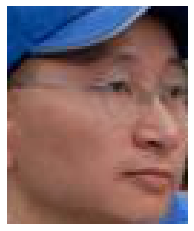

In [65]:
img = plt.imread('./WIDER_val/images/'+filename[0]+'/'+img_name[0][0][6][0][0]+'.jpg')
fig = plt.figure()#创建图
img1 = img[162:162+76,539:539+63]
plt.imshow(img1) # 显示图片
plt.axis('off') # 不显示坐标
#plt.gca().add_patch(plt.Rectangle((449,330),122,149))#gca get current axis返回axis
plt.show()

***清理数据，将比例特殊的数据去除

In [51]:
for i in range(61):
    index = []
    for j,file in enumerate(img_name[i][0]):
        img = cv.imread('./WIDER_val/images/'+filename[i]+'/'+file[0][0]+'.jpg')
        if img.shape[0]/img.shape[1] < 0.4 or img.shape[0]/img.shape[1]>0.7:
            index.append(j)
    m1 = np.delete(data[i][0],index,0)
    m2 = np.delete(img_name[i][0],index,0)
    data[i][0] = m1
    img_name[i][0] = m2
savemat('./WIDER_val/val.mat',{'face_bbx_list':data,'file_list':img_name})

***最终模型训练我们使用(480,270)，直接将坐标标签换算到reshape后的图片中，以便于搜索预选框。

In [199]:
m1 = loadmat("./WIDER_val/val1.mat")
filename = os.listdir('./WIDER_val/images')
filename.sort()
img_name1 = m1['file_list']
data1 = m1['face_bbx_list']
for i in range(61):
    index = []
    for j,file in enumerate(img_name1[i][0]):
        shape = cv.imread('./WIDER_val/images/'+filename[i]+'/'+file[0][0]+'.jpg').shape
        data1[i][0][j][0] = data1[i][0][j][0].astype(np.float32)
        for box in data1[i][0][j][0]:
            box[0] = box[0]*480/shape[1]
            box[1] = box[1]*270/shape[0]
            box[2] = box[2]*480/shape[1]
            box[3] = box[3]*270/shape[0]
savemat('./WIDER_val/val.mat',{'face_bbx_list':data1,'file_list':img_name1})

In [200]:
m = loadmat("./WIDER_train/train.mat")
a = m['face_bbx_list']
a[0][0][0][0]

array([[ 32.34375 , 142.1261  ,  23.4375  ,  14.252199],
       [106.40625 , 151.23167 ,  26.25    ,  17.02346 ],
       [138.75    , 120.7478  ,  20.625   ,  10.293255],
       [165.46875 , 110.85044 ,  18.75    ,  14.252199],
       [414.84375 , 149.2522  ,  29.53125 ,  16.231672],
       [383.90625 , 154.79472 ,  15.9375  ,  17.02346 ],
       [340.78125 , 135.39589 ,  17.34375 ,  12.272727],
       [280.3125  ,  97.39003 ,  15.46875 ,  11.480938],
       [346.875   , 121.935486,  21.09375 ,  13.064516]], dtype=float32)